<a href="https://colab.research.google.com/github/ravi-prakash1907/Machine-Learning-for-Cyber-Security/blob/main/Labs/rnn_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spam detection using RNN and Keras


In [20]:
# -*- coding: utf-8 -*-
"""
Origin of code:
---------------

Created on Wed Jan 23 11:27:12 2019
@author: Teenu
"""


'\nOrigin of code:\n---------------\n\nCreated on Wed Jan 23 11:27:12 2019\n\n@author: Teenu\n'

This code was also tester on 70:30 split of dataset.  
Presenting final results.

In [ ]:
from keras.layers import SimpleRNN,LSTM, Embedding, Dense#  in an embedding, words are represented by dense vectors where a vector represents the projection of the word into a continuous vector space.The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used. The position of a word in the learned vector space is referred to as its embedding.Keras offers an Embedding layer that can be used for neural networks on text data. It requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API also provided with Keras.
# Keras offers an Embedding layer that can be used for neural networks on text data. It requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API also provided with Keras https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
from keras.models import Sequential
import pandas as pd#pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#%matplotlib  inline
import seaborn as sns
sns.set

In [5]:
data=pd.read_csv ("https://raw.githubusercontent.com/ravi-prakash1907/Machine-Learning-for-Cyber-Security/main/Labs/dataset/spam.csv")

In [6]:
texts = []
labels = []
for i, item in enumerate(data['Category']):
    texts.append(data['Message'][i])
    #print(texts)
#   # print(labels)
    #print(i)
    if item == 'ham':
      labels.append(0)
    else:
      labels.append(1)

In [7]:
texts = np.asarray(texts)
labels = np.asarray(labels)

print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [8]:
max_features =10000# number of words used as features
maxlen=500# cut off the words after seeing 500 words in each document(email)
training_samples= int(5572*.8)
print(training_samples)

4457


In [9]:
validation_samples= int(5572-training_samples)
print(len(texts) == (training_samples + validation_samples))

print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))#Syntax : { } .format(value)

True
The number of training 4457, validation 1115 


In [10]:
tokenizer=Tokenizer()#Class for vectorizing texts, or/and turning texts into sequences (=list of word indexes, where the word of rank i in the dataset (starting at 1) has index i)
#print(tokenizer)
tokenizer.fit_on_texts(texts)
sequences=tokenizer.texts_to_sequences(texts)
#print(sequences)
word_index=tokenizer.word_index
print(word_index)
print("Found {0} unique words:".format(len(word_index)))
#print("Found {0} unique words: ".format(len(word_index)))

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'call': 16, 'have': 17, 'on': 18, '2': 19, 'that': 20, 'now': 21, 'are': 22, 'so': 23, 'but': 24, 'not': 25, 'or': 26, 'do': 27, 'can': 28, 'at': 29, "i'm": 30, 'ur': 31, 'get': 32, 'will': 33, 'if': 34, 'be': 35, 'with': 36, 'just': 37, 'no': 38, 'we': 39, 'this': 40, '4': 41, 'gt': 42, 'lt': 43, 'up': 44, 'when': 45, 'ok': 46, 'free': 47, 'from': 48, 'go': 49, 'how': 50, 'all': 51, 'out': 52, 'what': 53, 'know': 54, 'like': 55, 'good': 56, 'then': 57, 'got': 58, 'come': 59, 'was': 60, 'its': 61, 'am': 62, 'time': 63, 'day': 64, 'only': 65, 'love': 66, 'there': 67, 'send': 68, 'he': 69, 'want': 70, 'text': 71, 'as': 72, 'txt': 73, 'one': 74, 'going': 75, 'by': 76, 'ü': 77, "i'll": 78, 'need': 79, 'home': 80, 'about': 81, 'r': 82, 'lor': 83, 'sorry': 84, 'still': 85, 'see': 86, 'stop': 87, 'n': 88, 'back': 89, 'today': 90, 'da': 91, 'our': 92,

In [11]:
data= pad_sequences(sequences, maxlen=maxlen)
#print(data)
print("data shape:", data.shape)
np.random.seed(42)
indices=np.arange(data.shape[0])# shuffle data
np.random.shuffle(indices)
data=data[indices]

data shape: (5572, 500)


In [12]:
labels=labels[indices]
texts_train=data[:training_samples]
print(texts_train)
y_train=labels[:training_samples]
texts_test=data[training_samples:]
y_test=labels[training_samples:]#https://www.kaggle.com/kentata/rnn-for-spam-detection/data

[[   0    0    0 ...  274 1902    6]
 [   0    0    0 ...  448   12  996]
 [   0    0    0 ...   19   56 1580]
 ...
 [   0    0    0 ...    4  434  290]
 [   0    0    0 ...   17 6691  423]
 [   0    0    0 ...   44  104  226]]


In [13]:
model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 27s 119ms/step - loss: 0.4570 - acc: 0.8164 - val_loss: 0.1720 - val_acc: 0.9630
Epoch 2/10
60/60 [==============================] - 6s 106ms/step - loss: 0.1369 - acc: 0.9668 - val_loss: 0.0830 - val_acc: 0.9765
Epoch 3/10
60/60 [==============================] - 7s 108ms/step - loss: 0.0562 - acc: 0.9867 - val_loss: 0.1605 - val_acc: 0.9406
Epoch 4/10
60/60 [==============================] - 6s 105ms/step - loss: 0.1131 - acc: 0.9623 - val_loss: 0.0917 - val_acc: 0.9697
Epoch 5/10
60/60 [==============================] - 7s 112ms/step - loss: 0.0314 - acc: 0.9916 - val_loss: 0.0509 - val_acc: 0.9854
Epoch 6/10
60/60 [==============================] - 6s 108ms/step - loss: 0.0447 - acc: 0.9897 - val_loss: 0.0653 - val_acc: 0.9798
Epoch 7/10
60/60 [==============================] - 7s 109ms/step - loss: 0.0149 - acc: 0.9965 - val_loss: 0.0545 - val_acc: 0.9821
Epoch 8/10
60/60 [==============================] - 7s 112ms/step - loss: 0

In [14]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

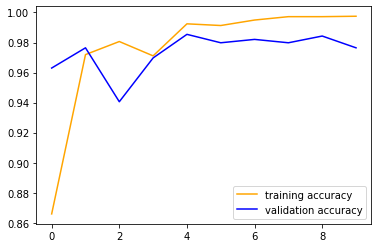

In [16]:
new="FreeMsg Hey there darling it's 'S BEeN 3 now and no word back"
yhat = model.predict_classes(new)
epochs=range(len(acc))
plt.plot(epochs,acc,'-', color='orange',label='training accuracy')
plt.plot(epochs,val_acc,'-',color='blue', label='validation accuracy')
plt.legend()
plt.show()

In [18]:
print("Validity accuracy:",val_acc[-1])

Validity accuracy: 0.976457417011261
